In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os

In [57]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/gdrive/My Drive/'

documents = f'{root_dir}/MSc/'
os.listdir(documents)

Mounted at /content/gdrive


['Crime_data_2012_ new.csv',
 'Crime_data_2012.csv',
 'Crime_data.csv',
 'crime_data_renamed.csv',
 'Updated_Crime_data_2012.csv']

In [29]:
crime_data = pd.read_csv(documents + "/Updated_Crime_data_2012.csv")
crime_data.head()

,Crime Category,Anuradhapura,Ampara,Badulla (Badfulla & Bandarawela ),Batticaloa,"Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda",Galle (Galle/ Elpitiya),Gampaha (Kelaniya/Gampha/Negombo Div),"Jaffna(Jaffna, KKS)","Kalutara (Kalutara,Panadura)",...,Matara,Monaragala,Mulllativu,"Nuwara Eliya (Hatton, Nuwara Eliya )",Polonnaruwa,"Puttlam (Puttlam, Chilaw )",Ratnapura,Hambanthota (Tangalle ),"Trincomalee (Kantale, Trincomalee )",Vavuniya
0,Kidnapping,68,29,38,21,154,73,159,23,72,...,51,29,5,21,42,55,56,53,17,10
1,Arson,47,31,14,33,22,38,27,6,17,...,28,16,4,10,17,21,50,23,23,9
2,Mischief over Rs.5000/=,107,36,42,38,140,32,100,46,50,...,26,22,3,32,31,26,68,33,18,11
3,H.B. & Theft,834,239,359,227,2996,748,3235,204,1120,...,555,334,30,190,283,438,900,487,210,120
4,Grevious Hurt,108,69,112,56,248,81,140,42,62,...,40,27,15,96,48,25,101,16,50,13


In [30]:
# Data cleaning & Data preprocessing

# Step 1: Inspecting the Data
print(crime_data.head())
# Check data types and missing values
print(crime_data.info())

# Step 2: Data Cleaning
# No missing values observed.

#Rename columns for better readability
crime_data.rename(columns={"Badulla (Badfulla & Bandarawela )":"Badulla",
"Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda":"Colombo",
"Galle (Galle/ Elpitiya)":"Galle",
"Gampaha (Kelaniya/Gampha/Negombo Div)":"Gampaha",
"Jaffna(Jaffna, KKS)":"Jaffna",
"Kalutara (Kalutara,Panadura)":"Kalutara",
"Kandy (Kandy, Gampola)":"Kandy",
"Kegalle (Kegalle, Sithawakapura0":"Kegalle",
"Kilinochchi (Kilinochchi, Mankulam )":"Kilinochchi",
"Kurunegala (Kurunegala, Kuliyapitiya, Nikaweratiya )":"Kurunegala",
"Nuwara Eliya (Hatton, Nuwara Eliya )":"Nuwara Eliya",
"Puttlam (Puttlam, Chilaw )":"Puttlam",
"Hambanthota (Tangalle )":"Hambanthota",
"Trincomalee (Kantale, Trincomalee )":"Trincomalee"}, inplace=True)
print(crime_data.head())




             Crime Category  Anuradhapura  Ampara  \
0                Kidnapping            68      29   
1                     Arson            47      31   
2  Mischief  over Rs.5000/=           107      36   
3              H.B. & Theft           834     239   
4            Grevious  Hurt           108      69   

   Badulla (Badfulla & Bandarawela )  Batticaloa  \
0                                 38          21   
1                                 14          33   
2                                 42          38   
3                                359         227   
4                                112          56   

   Colombo (Colombo South, North, Central) Mt. Laviniya, Nugegoda  \
0                                                154                
1                                                 22                
2                                                140                
3                                               2996                
4                      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Arson'),
  Text(1, 0, 'Attempted Homicide'),
  Text(2, 0, 'Auto gun'),
  Text(3, 0, 'Cheating'),
  Text(4, 0, 'Child abuse'),
  Text(5, 0, 'Counterfeiting Currency'),
  Text(6, 0, 'Drugs'),
  Text(7, 0, 'Extortion'),
  Text(8, 0, 'Grevious  Hurt'),
  Text(9, 0, 'H.B. & Theft'),
  Text(10, 0, 'Hurt  by Knife etc.'),
  Text(11, 0, 'Kidnapping'),
  Text(12, 0, 'Mischief  over Rs.5000/='),
  Text(13, 0, 'Offences against  State'),
  Text(14, 0, 'Offensive weapons'),
  Text(15, 0, 'Procuration'),
  Text(16, 0, 'Rape / Incest'),
  Text(17, 0, 'Riot'),
  Text(18, 0, 'Robbery'),
  Text(19, 0, 'Sexual Abuse'),
  Text(20, 0, 'Suicide'),
  Text(21, 0, 'Theft ')])

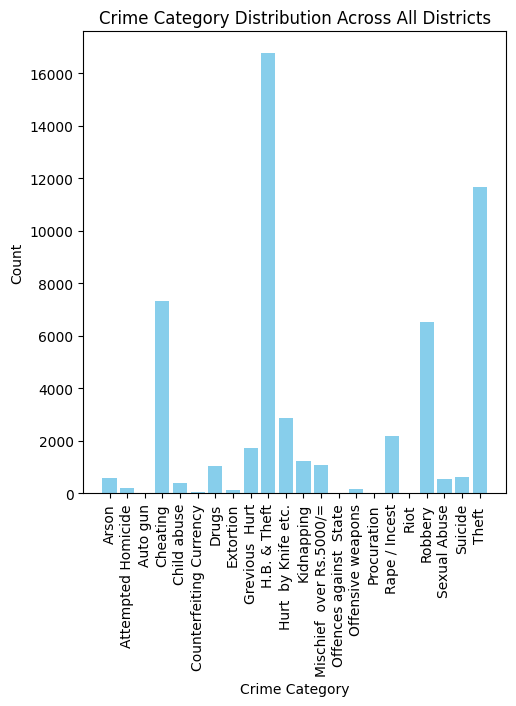

In [40]:
# Descriptive analysis
import pandas as pd
import matplotlib.pyplot as plt


# Transpose the data to have districts as rows and crime categories as columns
data_transposed = crime_data.set_index('Crime Category').T.reset_index()

# Melt the transposed data to have Crime Category and District as columns
melted_data = pd.melt(data_transposed, id_vars='index', var_name='Crime Category', value_name='Count')

# Group the melted data by Crime Category and calculate total counts
crime_counts = melted_data.groupby('Crime Category')['Count'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(crime_counts['Crime Category'], crime_counts['Count'], color='skyblue')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.title('Crime Category Distribution Across All Districts')
plt.xticks(rotation=90)





In [46]:
import pandas as pd

# Calculate the total count of crimes
crime_counts = crime_data.sum(axis=1)
total_crimes = crime_counts.sum()

#Calculate the percentage of each crime category
crime_percentages = (crime_counts / total_crimes) * 100

print("Percentage of each crime category:")
print(crime_percentages)


Percentage of each crime category:
0      2.229299
1      1.058555
2      1.981398
3     30.325347
4      3.123191
5      5.193254
6      1.167125
7      0.405327
8      3.959178
9      0.027142
10    11.843153
11     1.002461
12     0.237044
13    13.267226
14    21.153011
15     0.081427
16     0.003619
17     0.694847
18     0.045237
19     0.289519
20     0.052475
21     1.860162
dtype: float64


<ipython-input-46-0658a4a75a34>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_counts = crime_data.sum(axis=1)  # Sum across rows to get total count for each crime category


<ipython-input-49-88340a00553b>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_crimes_category = crime_data.sum(axis=1)[1:]


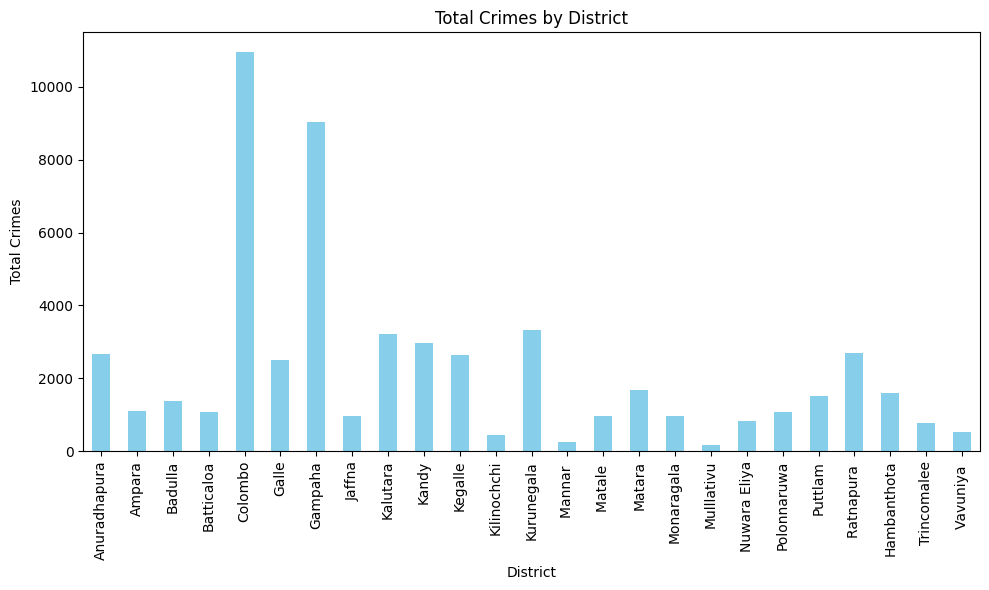

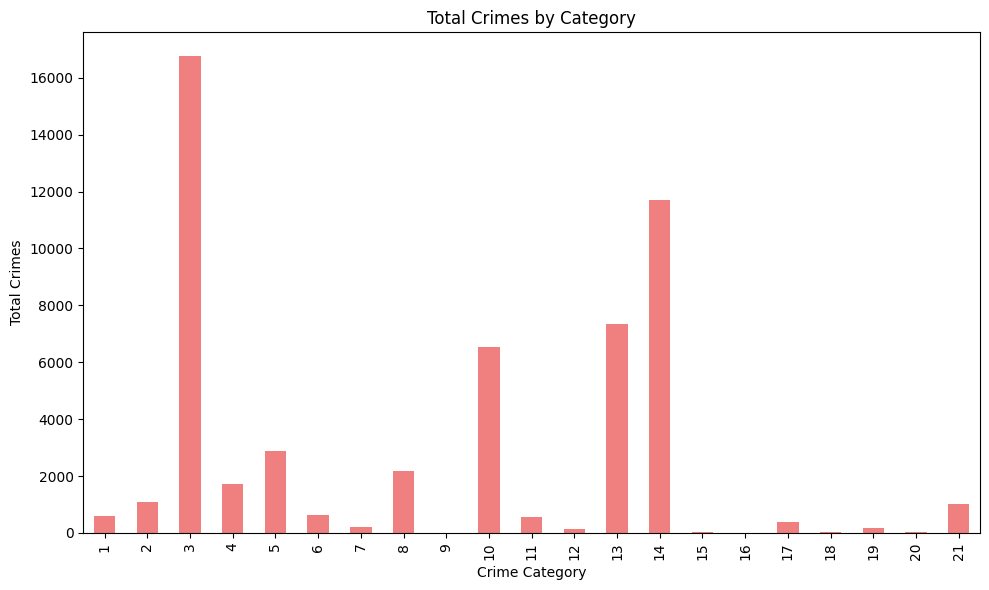

In [49]:
#Descriptive analysis

# Total crimes by category and district
total_crimes_district = crime_data.sum(axis=0)[1:]
total_crimes_category = crime_data.sum(axis=1)[1:]

# Plotting total crimes by district
plt.figure(figsize=(10, 6))
total_crimes_district.plot(kind='bar', color='skyblue')
plt.title('Total Crimes by District')
plt.xlabel('District')
plt.ylabel('Total Crimes')
plt.tight_layout()
plt.show()

# Plotting total crimes by category
plt.figure(figsize=(10, 6))
total_crimes_category.plot(kind='bar', color='lightcoral')
plt.title('Total Crimes by Category')
plt.xlabel('Crime Category')
plt.ylabel('Total Crimes')
plt.tight_layout()
plt.show()

       Anuradhapura      Ampara     Badulla  Batticaloa      Colombo  \
count     22.000000   22.000000   22.000000   22.000000    22.000000   
mean     121.000000   49.590909   62.681818   49.318182   497.681818   
std      209.708868   79.303912   96.595074   76.327232   910.517979   
min        0.000000    0.000000    0.000000    0.000000     0.000000   
25%        6.250000    1.000000    2.250000    2.000000    21.000000   
50%       30.000000   22.500000   22.500000    8.500000    57.000000   
75%      107.750000   37.750000   82.000000   55.000000   346.250000   
max      834.000000  242.000000  359.000000  227.000000  2996.000000   

            Galle      Gampaha      Jaffna     Kalutara       Kandy  ...  \
count   22.000000    22.000000   22.000000    22.000000   22.000000  ...   
mean   114.136364   410.545455   44.000000   146.136364  135.272727  ...   
std    189.095414   822.530053   68.934061   277.797510  233.163785  ...   
min      0.000000     0.000000    0.000000     

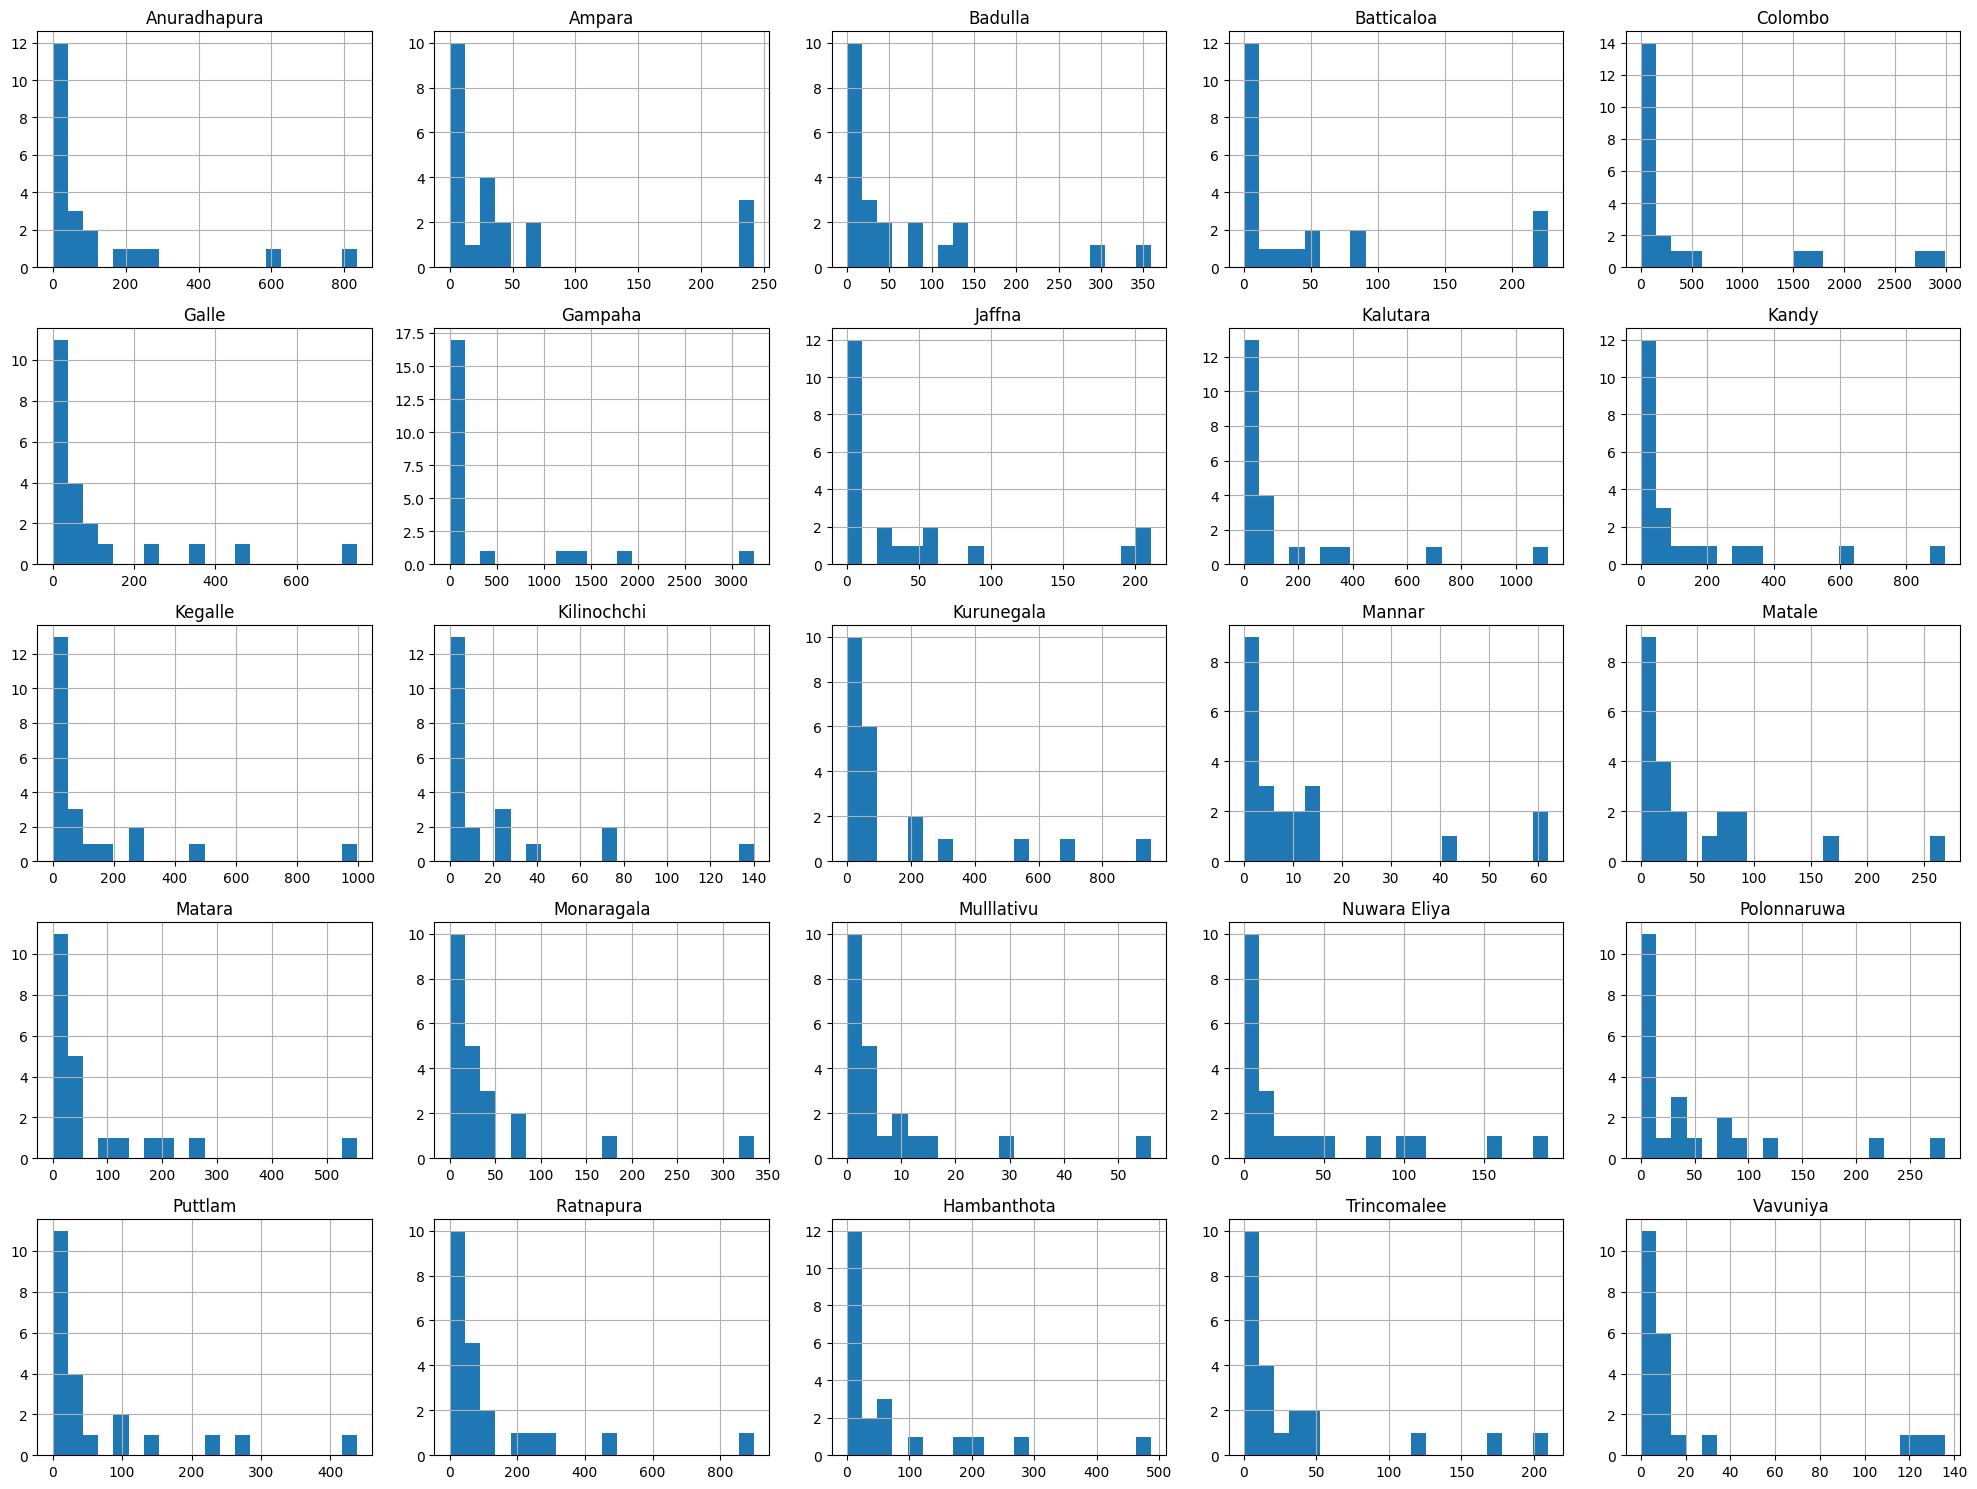

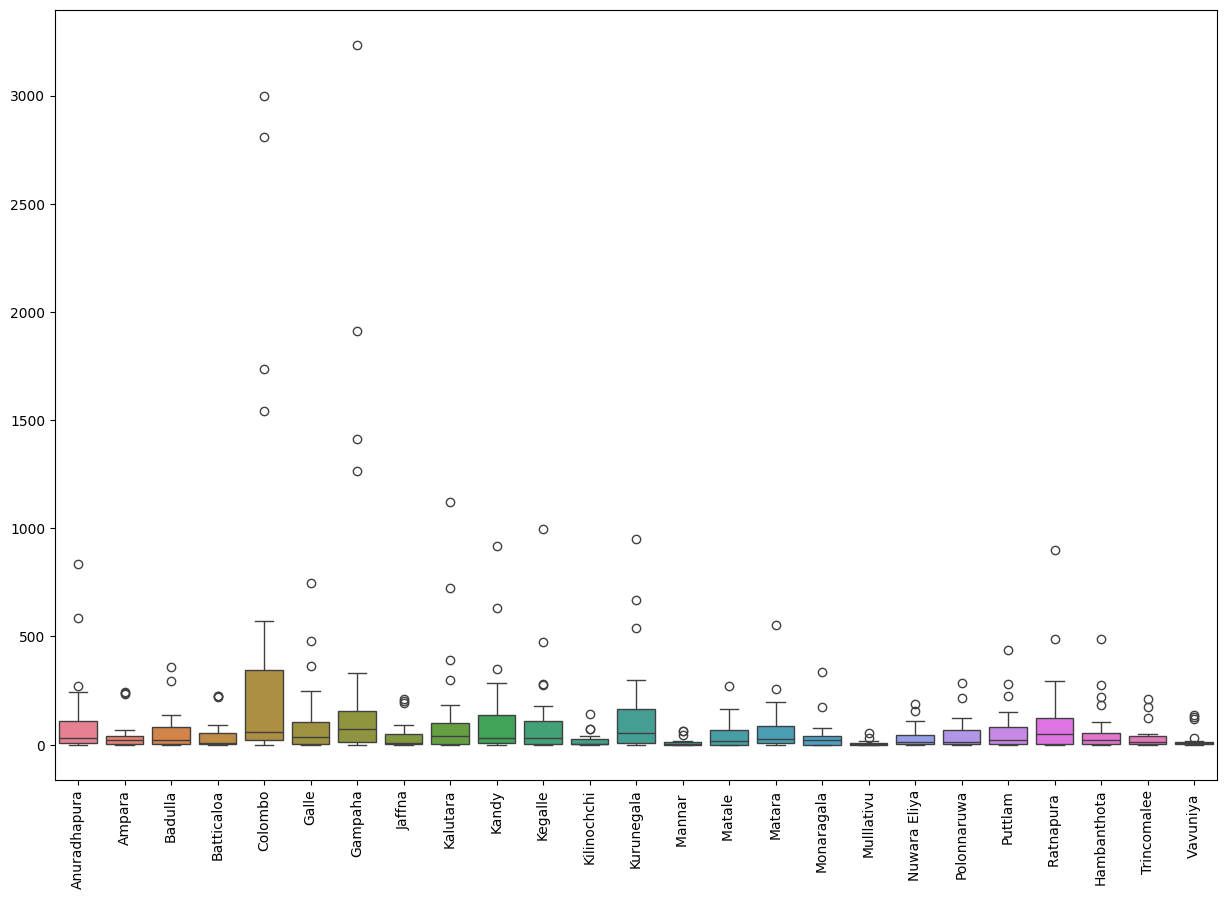

In [50]:
#Descriptive analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = crime_data.describe()
print(summary_stats)

# Visualizations
# Plotting histograms for each crime category
crime_data.drop('Crime Category', axis=1).hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

# Box plot for better understanding of distribution
plt.figure(figsize=(15, 10))
sns.boxplot(data=crime_data.drop('Crime Category', axis=1))
plt.xticks(rotation=90)
plt.show()


Mounted at /content/gdrive


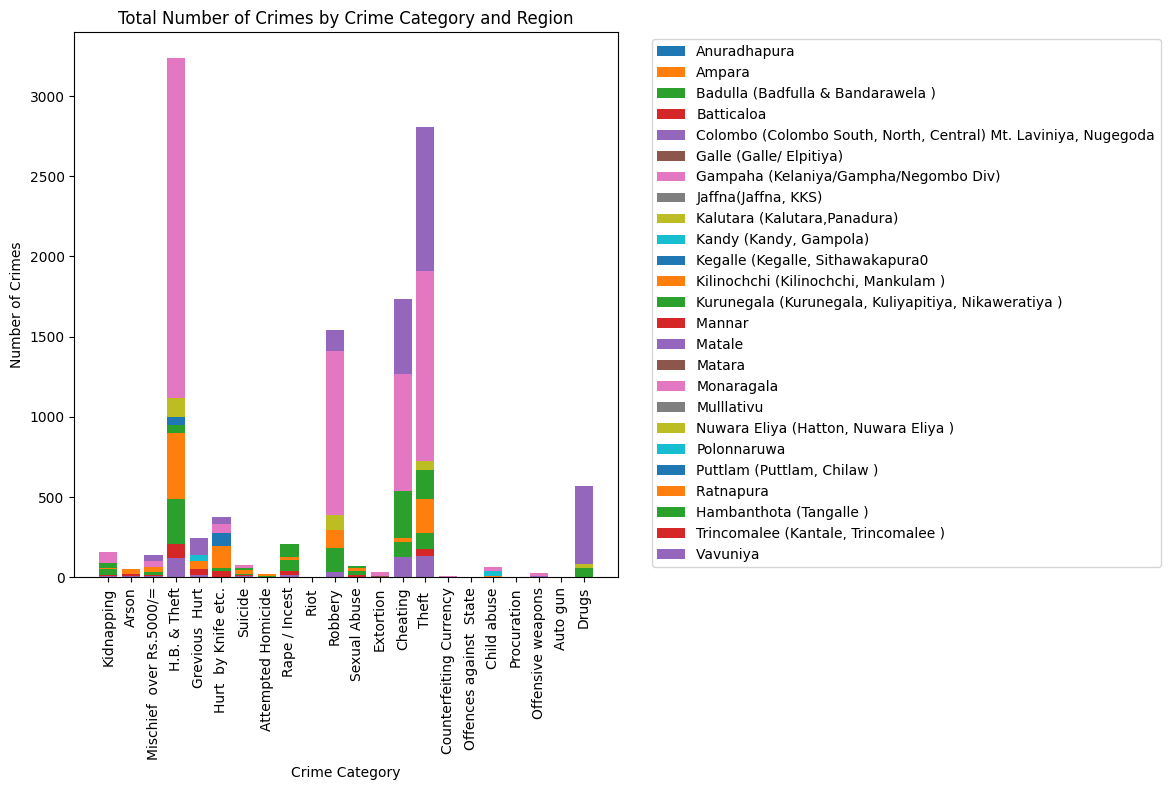

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = '/content/gdrive/My Drive'

document = f'{root_dir}/MSc/'
# Load the dataset from CSV file
df = pd.read_csv(document + "Updated_Crime_data_2012.csv",index_col='Crime Category')

# Transpose the DataFrame to have regions as rows and crime categories as columns
df_transposed = df.transpose()

# Calculate the total number of crimes for each region
df_transposed['Total'] = df_transposed.sum(axis=1)

# Sort the dataframe by total crimes in descending order
df_sorted = df_transposed.sort_values(by='Total', ascending=False)

# Top 3 regions for each crime category
top_regions = {}
for category in df_transposed.columns[:-1]:  # Exclude the 'Total' column
    top_regions[category] = df_sorted.head(3)[[category, 'Total']]

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))

# Loop through each region
for region in df_transposed.index:
    plt.bar(df_transposed.columns[:-1], df_transposed.loc[region][:-1], label=region)

plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes')
plt.title('Total Number of Crimes by Crime Category and Region')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()



<ipython-input-51-72987432f0dd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime_data.corr()


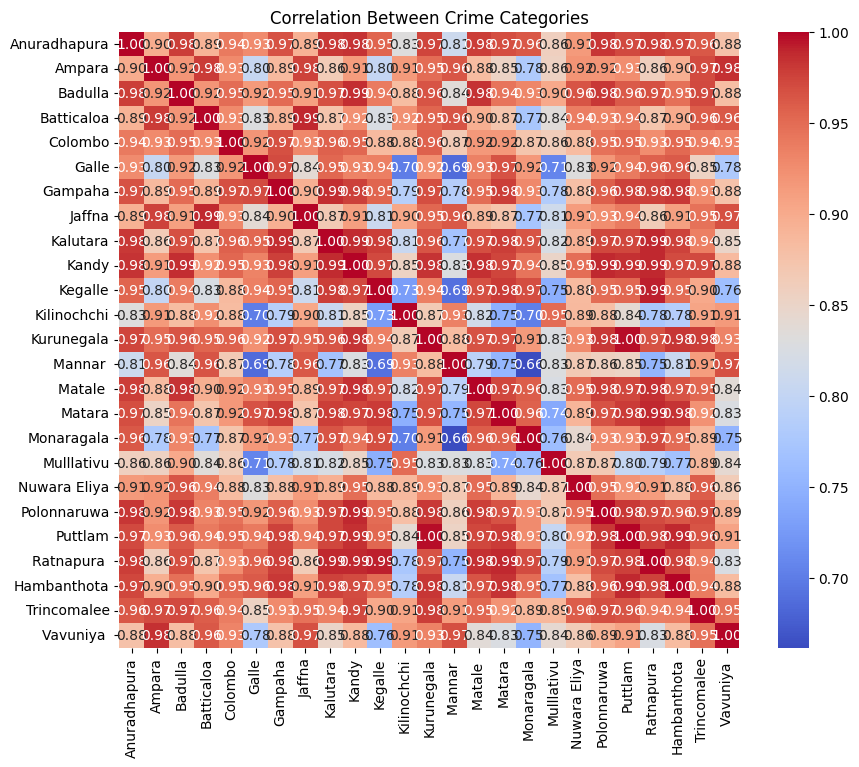

In [51]:
#Diagnosis Analysis
# Correlation analysis
correlation_matrix = crime_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Crime Categories')
plt.show()


In [67]:
#Predictive analysis
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# One-hot encode categorical variables
data_encoded = pd.get_dummies(crime_data)

# Prepare data
X = data_encoded.drop(columns=['Total_Crimes'])
y = data_encoded['Total_Crimes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 97724.47415999994


Top 5 Areas with Highest Total Crimes:
3     16759
14    11690
13     7332
10     6545
5      2870
dtype: int64


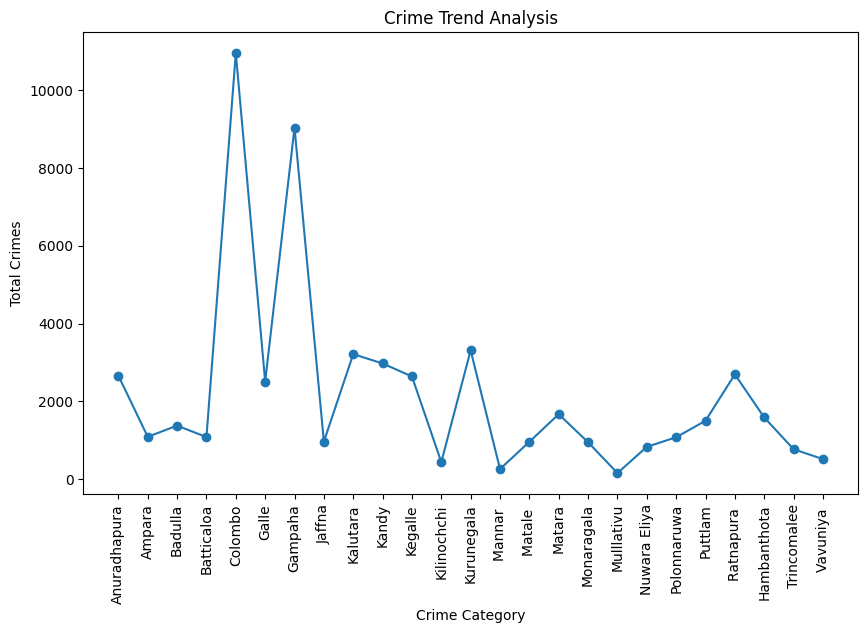

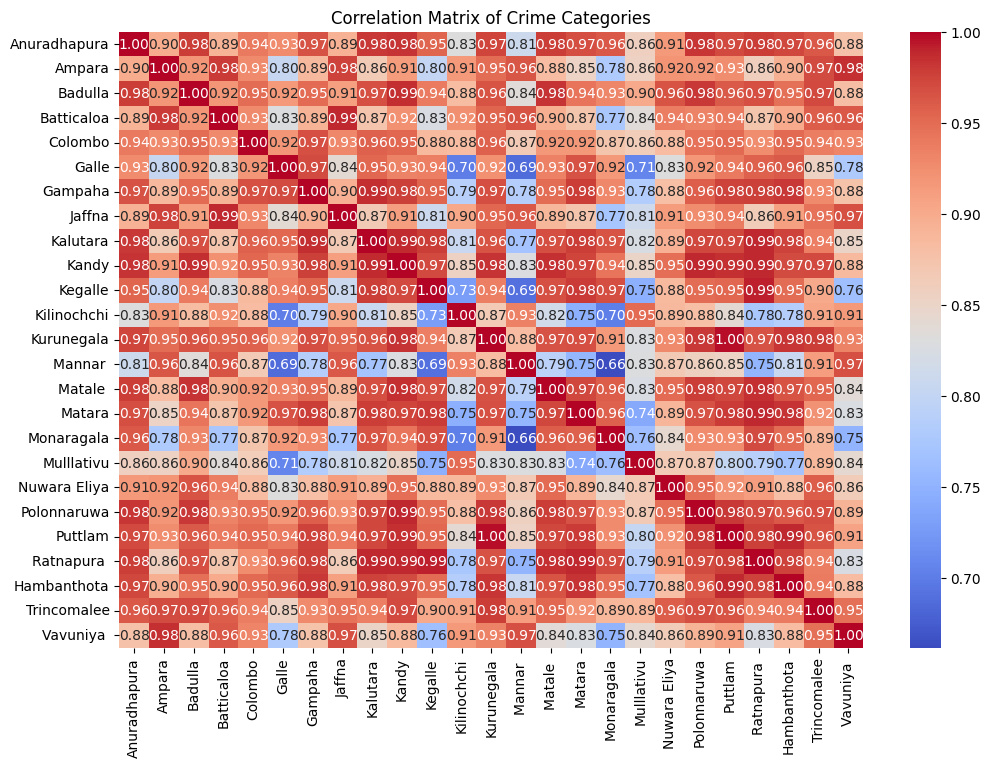

Mean Squared Error: 1109.279710303164


In [60]:
#Prescriptive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#Identify High Crime Areas
crime_totals = crime_data.drop('Crime Category', axis=1).sum(axis=1)
high_crime_areas = crime_totals.sort_values(ascending=False).head(5)
print("Top 5 Areas with Highest Total Crimes:")
print(high_crime_areas)

#Analyze Crime Trends
crime_trends = crime_data.drop('Crime Category', axis=1).sum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(crime_trends.index, crime_trends.values, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Crime Category')
plt.ylabel('Total Crimes')
plt.title('Crime Trend Analysis')
plt.show()

#Correlation Analysis
correlation_matrix = crime_data.drop('Crime Category', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crime Categories')
plt.show()

#Predictive Modeling
X = crime_data.drop('Crime Category', axis=1)
y = crime_totals

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
